In [48]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
# matplib 한글폰트
!pip install koreanize-matplotlib
import koreanize_matplotlib

# (1) 데이터 가져오기
* 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
* 여기에서 데이터를 상세히 확인할 수 있습니다.

In [50]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
#데이터 train 데이터로 설정
train.shape

(10886, 12)

In [51]:
#train 정보확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
* to_datetime 활용 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime 참조
* pandas datetime extract year month day 키워드로 검색해 보기

In [52]:
train['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [53]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [54]:
# pd.to_datetime() 함수를 사용하여 시간 형식의 object 자료형 column을 datetime 형식으로 손쉽게 바꿀 수 있습니다.
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [55]:
#year 칼럼 생성
train['Year'] = train['datetime'].dt.year 
train['Year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: Year, Length: 10886, dtype: int64

In [56]:
# 월 칼럼 생성
train['Month'] = train['datetime'].dt.month
train['Month']

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: Month, Length: 10886, dtype: int64

In [57]:
# 일 칼럼 생성
train['Day'] = train['datetime'].dt.day
train['Day']

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: Day, Length: 10886, dtype: int64

In [58]:
# 시 칼럼 생성
train['Hour'] = train['datetime'].dt.hour
train['Hour']

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: Hour, Length: 10886, dtype: int64

In [59]:
# 분 칼럼 생성
train['Minute'] = train['datetime'].dt.minute
train['Minute']

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: Minute, Length: 10886, dtype: int64

In [60]:
# 초 칼럼 생성
train['Second'] = train['datetime'].dt.second
train['Second']

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: Second, Length: 10886, dtype: int64

In [61]:
#  어떤 요일인지 확인
#  print("\nWeekday:")
#  print(df.Date_time.dt.weekday_name.head())

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
 * sns.countplot 활용해서 시각화하기
 * subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

In [62]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour,Minute,Second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


Text(0.5, 1.0, 'Day')

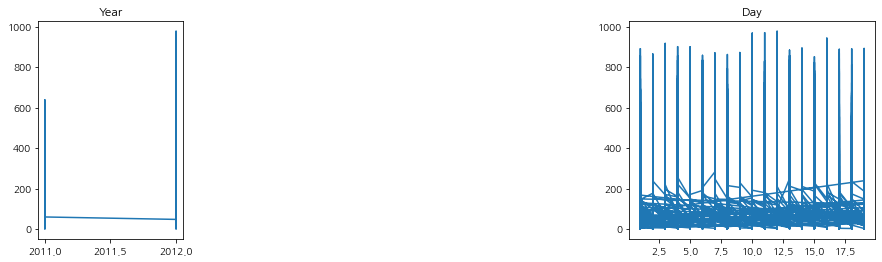

In [75]:
# year, month, day, hour, minute, second 시각화
plt.figure(figsize=(15, 4)) 
sns.countplot
# plt.subplot(총 행 개수(row), 총 열 개수(column), 그래프 번호)
#plt1
x = train['Year']
y = train['count']

plt.subplot(1,5,1)
plt.plot(x,y)
plt.title("Year")
#plt2
x = train['Month']
y = train['count']

plt.subplot(1,2,2)
plt.plot(x,y)
plt.title("Month")
#plt3
x = train['Day']
y = train['count']

plt.subplot(1,3,3)
plt.plot(x,y)
plt.title("Day")

이것때문에 1시간걸렸는데 조원님이 가르쳐주셨다.

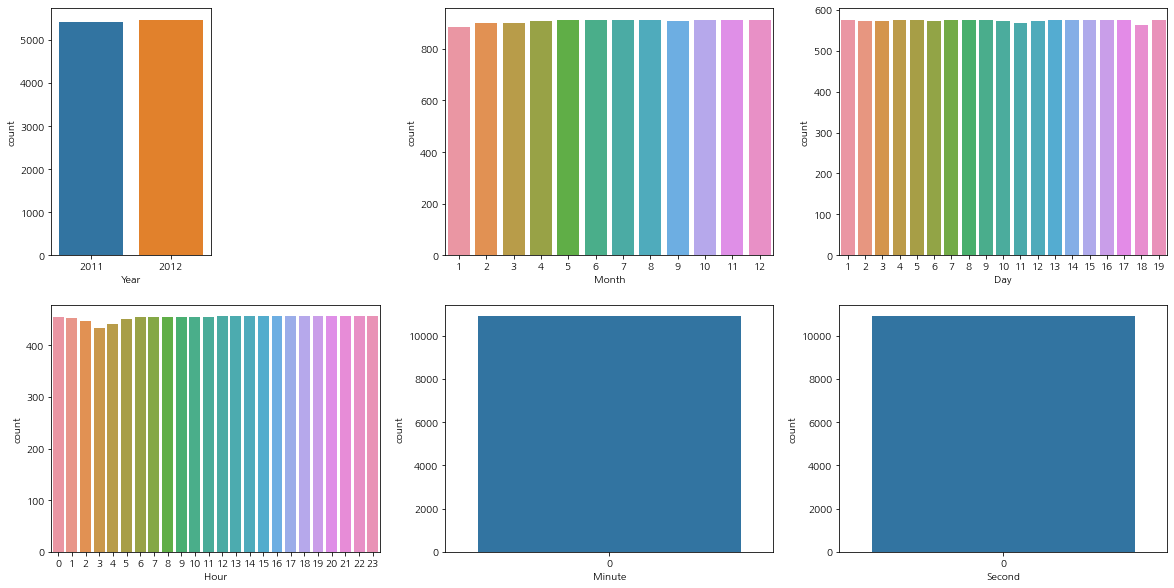

In [84]:
import seaborn as sns

plt.figure(figsize=(20, 10))

plt.subplot(2, 6, 1)
sns.countplot(x="Year", data=train)

plt.subplot(2, 3, 2)
sns.countplot(x="Month", data=train)

plt.subplot(2, 3, 3)
sns.countplot(x="Day", data=train)

plt.subplot(2, 3, 4)
sns.countplot(x="Hour", data=train)

plt.subplot(2, 3, 5)
sns.countplot(x="Minute", data=train)

plt.subplot(2, 3, 6)
sns.countplot(x="Second", data=train)

plt.show()

분과 초는 0밖에없어서, 하나만 가르켰다.

# (4) X, y 컬럼 선택 및 train/test 데이터 분리
* X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

* count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [213]:
df_X=train[['Year','Month','Hour','Day','temp','humidity','atemp','windspeed']]
df_X
y=train['count']

In [214]:
from sklearn.model_selection import train_test_split
# sklearn model_selection패키지의 train_test_split 함수를 임포트

X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    y, 
                                                    test_size=0.2,
                                                    
                                                    random_state=2178)
y_test

10337      6
7796      36
5560     272
377        1
6863     366
        ... 
6538     343
6735     211
3764     226
5497       2
6777     385
Name: count, Length: 2178, dtype: int64

In [215]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 8) (8708,)
(2178, 8) (2178,)


# (5) LinearRegression 모델 학습
* sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [216]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("슝=3")
model.fit(X_train, y_train)

슝=3


LinearRegression()

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
* 학습된 모델에 X_test를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
* mse 값과 함께 rmse 값도 계산하기

손실함수값

* MAE : Mean Absolute Error, 오차의 절댓값의 평균
* MSE : Mean Squared Error, 오차의 제곱의 평균
* RMSE : Root Mean Squared Error, MSE의 제곱근 (이것이 손실함수) 조원님이 알려주셧다!!
* R-squared : Coefficient of Determination, 결정 계수

In [217]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [219]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse
print("슝=3")

슝=3


In [220]:
#예측하기
predictions = model.predict(X_test)
predictions

array([141.56962587, 134.41149278, 305.9405108 , ..., 194.33453303,
        43.04611604, 317.19265832])

In [221]:
MSE(y_test,predictions)

19829.313192026126

loss(

In [222]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

19829.313192026126

In [223]:
RMSE(y_test,predictions)

140.816594164275

150밑으로 내려보자.

df_X=train[['Year','Month','Hour','Day']]을 했을때는 155가 나왔지만, 컬럼을 더했을때는 140이 된다는것을 알게되었다.

# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
 * x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
 * x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

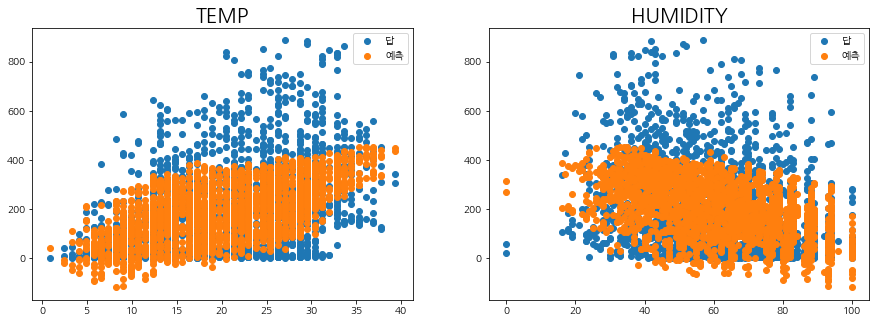

In [245]:


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], y_test,label ="답")
plt.scatter(X_test['temp'], predictions,label = "예측")
plt.legend()
plt.title('TEMP', fontsize = '20')

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test,label = "답")
plt.scatter(X_test['humidity'], predictions,label = "예측") 
plt.legend()
plt.title('HUMIDITY', fontsize = '20')
plt.show()

# 회고

시각화부분은 정말로 어려웠다. 하지만, 조원분들의 조언으로, 여러 시각화들을 해낼수 있었다. 
더욱더 해내고싶었지만, 다음시간에 더집중해서 해내야겠다.

* 새로알아낸사실

RMSE는 손실함수라고 알려주셨다.

또한, 컬럼이 적을수록  오차가 적을줄 알았는데, 오히려 많은것을보고 놀랐다.